The downloaded database is in CSV files , we have to import it

In [7]:
import pandas as pd
import os

# Path to folder
path = r"E:\DEPI\Assignment 4\music store data"

# Load CSVs
customers = pd.read_csv(os.path.join(path, "customer.csv"))
invoices = pd.read_csv(os.path.join(path, "invoice.csv"))
invoice_items = pd.read_csv(os.path.join(path, "invoice_line.csv"))
tracks = pd.read_csv(os.path.join(path, "track.csv"))
genres = pd.read_csv(os.path.join(path, "genre.csv"))
albums = pd.read_csv(os.path.join(path, "album.csv"))
artists = pd.read_csv(os.path.join(path, "artist.csv"))


# Now with some exploration

In [9]:
print("----customers data:----\n")
print(customers.head())
print(customers.info())
print("\n ----invoices data:----\n")
print(invoices.head())
print(invoices.info())
print("\n---- invoice_items data:-----\n")
print(invoice_items.head())
print(invoice_items.info())
print("\n ----tracks data:----\n")
print(tracks.head())
print(tracks.info())
print("\n ----genres data:----\n")
print(genres.head())
print(genres.info())
print("\n---- albums data:----\n")
print(albums.head())
print(albums.info())

----customers data:----

   customer_id first_name    last_name  \
0            1       Luís    Gonçalves   
1            2     Leonie       Köhler   
2            3   François     Tremblay   
3            4      Bjørn       Hansen   
4            5  František  Wichterlová   

                                            company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                  JetBrains s.r.o.   

                           address                 city state         country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart   NaN         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo   NaN      

that was the schema in get hub for more clarification 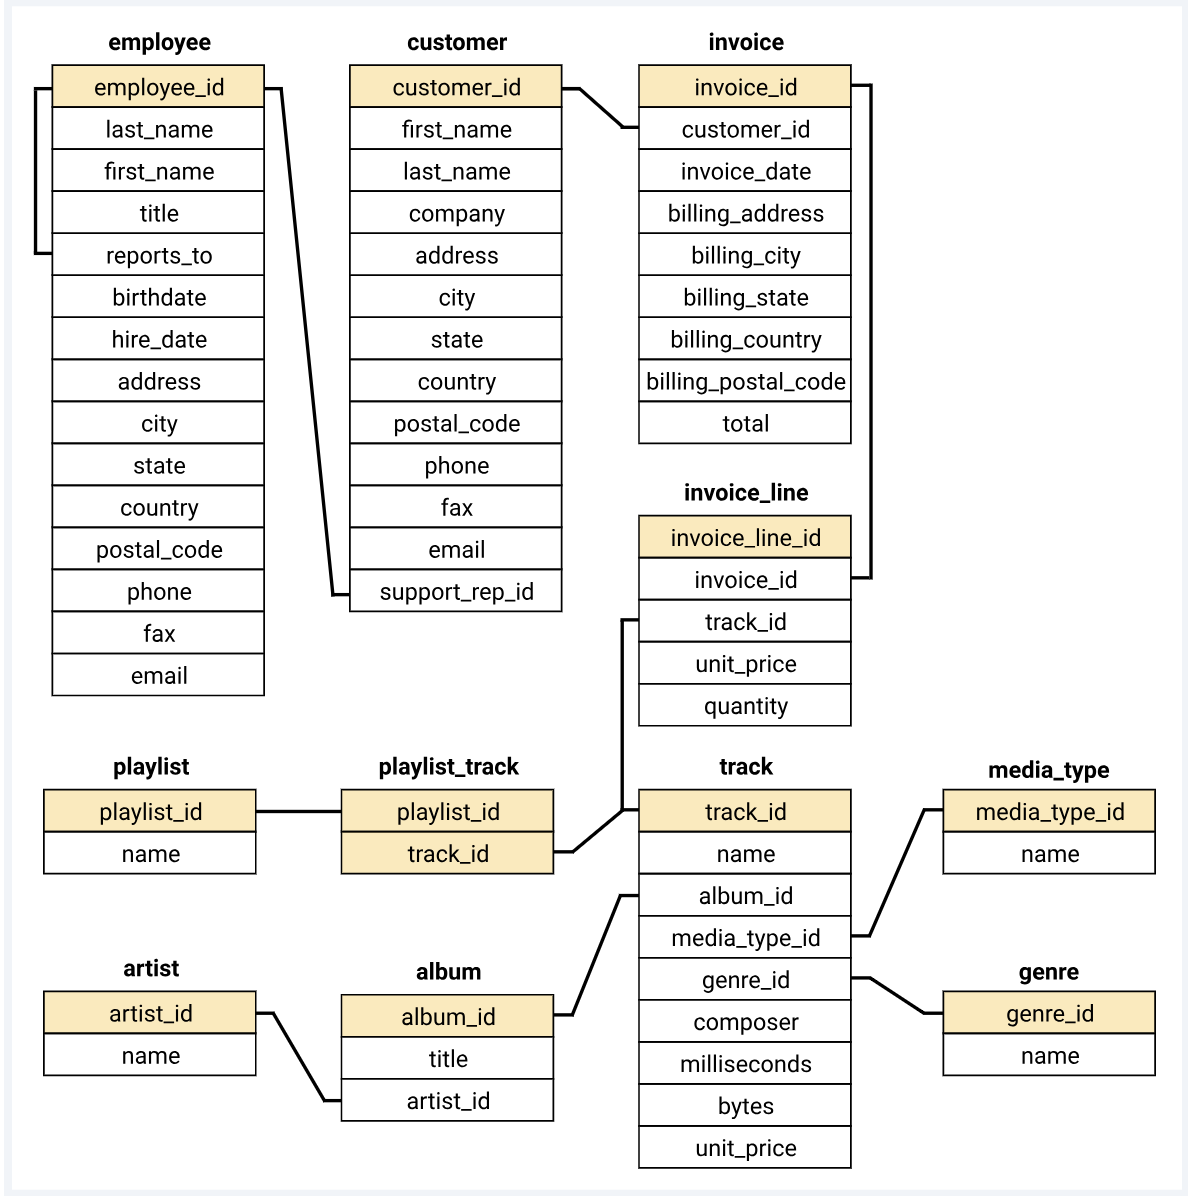

# Cleaning & Preprocessing

Lets try to preprocess our answers

Q1: Which country has the most customers?

Table: customers

Columns needed:

customer_id (unique identifier, must be int)

country (must be string/object)
____________________________________________________

Q2: Which customer has spent the most money?

Table: invoices

Columns needed:

customer_id (must be int, links to customers)

total (must be numeric)
____________________________________________________

Q3: How much revenue was generated from each music genre?

Tables: invoice_items, tracks, genres

Columns needed:

invoice_items.unit_price (numeric)

invoice_items.quantity (numeric)

tracks.track_id (int, links)

tracks.genre_id (int, links)

genres.name (string)
____________________________________________________

Q4: What is the average transaction value per customer?

Table: invoices

Columns needed:

customer_id (int)

total (numeric)
____________________________________________________

Q5: What is the total revenue for each year?

Table: invoices

Columns needed:

invoice_date (datetime)

total (numeric)

In [15]:
# -------------------------------
# Q1: Country with most customers
# -------------------------------
print("\nQ1 Columns:")
print("customer_id dtype:", customers['customer_id'].dtype)
print("country dtype:", customers['country'].dtype)

# -------------------------------
# Q2: Top customer by spending
# -------------------------------
print("\nQ2 Columns:")
print("invoice.customer_id dtype:", invoices['customer_id'].dtype)
print("invoice.total dtype:", invoices['total'].dtype)

# -------------------------------
# Q3: Revenue by music genre
# -------------------------------
print("\nQ3 Columns:")
print("invoice_line.unit_price dtype:", invoice_items['unit_price'].dtype)
print("invoice_line.quantity dtype:", invoice_items['quantity'].dtype)
print("track.track_id dtype:", tracks['track_id'].dtype)
print("track.genre_id dtype:", tracks['genre_id'].dtype)
print("genre.name dtype:", genres['name'].dtype)

# -------------------------------
# Q4: Avg transaction per customer
# -------------------------------
print("\nQ4 Columns:")
print("invoice.customer_id dtype:", invoices['customer_id'].dtype)
print("invoice.total dtype:", invoices['total'].dtype)

# -------------------------------
# Q5: Total revenue per year
# -------------------------------
print("\nQ5 Columns:")
print("invoice.invoice_date dtype:", invoices['invoice_date'].dtype)
print("invoice.total dtype:", invoices['total'].dtype)

# -------------------------------
# Fixing dtypes if needed
# -------------------------------
# Convert invoice_date to datetime
if invoices['invoice_date'].dtype != 'datetime64[ns]':
    invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], errors='coerce')
    print("\nConverted 'invoice_date' to datetime.")

# Convert numeric fields
invoices['total'] = pd.to_numeric(invoices['total'], errors='coerce')
invoice_items['unit_price'] = pd.to_numeric(invoice_items['unit_price'], errors='coerce')
invoice_items['quantity'] = pd.to_numeric(invoice_items['quantity'], errors='coerce')



Q1 Columns:
customer_id dtype: int64
country dtype: object

Q2 Columns:
invoice.customer_id dtype: int64
invoice.total dtype: float64

Q3 Columns:
invoice_line.unit_price dtype: float64
invoice_line.quantity dtype: int64
track.track_id dtype: int64
track.genre_id dtype: int64
genre.name dtype: object

Q4 Columns:
invoice.customer_id dtype: int64
invoice.total dtype: float64

Q5 Columns:
invoice.invoice_date dtype: datetime64[ns]
invoice.total dtype: float64


# Q1. Which customer has spent the most money?

Integration & Aggregation:

We need Invoices.Total and Customers (FirstName, LastName, CustomerId).

Integration: Join Invoices with Customers on CustomerId.

Aggregation: SUM(Total) grouped by CustomerId to find the top spender.

In [18]:
print("Invoices columns:", invoices.columns)
print("Customers columns:", customers.columns)


Invoices columns: Index(['invoice_id', 'customer_id', 'invoice_date', 'billing_address',
       'billing_city', 'billing_state', 'billing_country',
       'billing_postal_code', 'total'],
      dtype='object')
Customers columns: Index(['customer_id', 'first_name', 'last_name', 'company', 'address', 'city',
       'state', 'country', 'postal_code', 'phone', 'fax', 'email',
       'support_rep_id'],
      dtype='object')


In [22]:
# Merge Invoices with Customers
invoice_customers = invoices.merge(customers, on="customer_id", how="inner")

# Aggregate: total sales per customer
customer_sales = (
    invoice_customers
    .groupby(["customer_id", "first_name", "last_name"])["total"]
    .sum()
    .reset_index()
    .sort_values(by="total", ascending=False)
)

print("Top 10 Customers by Purchases:")
print(customer_sales.head(10))
print("\nthe most customer spent his mony is " + customer_sales.iloc[0]['first_name'] + " " + customer_sales.iloc[0]['last_name'] + " with total of " + str(customer_sales.iloc[0]['total']))


Top 10 Customers by Purchases:
    customer_id first_name    last_name   total
4             5  František  Wichterlová  144.54
5             6     Helena         Holý  128.70
45           46       Hugh     O'Reilly  114.84
57           58      Manoj       Pareek  111.87
0             1       Luís    Gonçalves  108.90
12           13   Fernanda        Ramos  106.92
33           34       João    Fernandes  102.96
41           42      Wyatt       Girard   99.99
2             3   François     Tremblay   99.99
16           17       Jack        Smith   98.01

the most customer spent his mony is František Wichterlová with total of 144.54


# Q2. Which country generates the most revenue?

Integration & Aggregation:

We need Invoices.Total and Customers.Country.

Integration: Join Invoices with Customers on customer_id.

Aggregation: SUM(Total) grouped by Country.

In [25]:
country_sales = (
    invoice_customers
    .groupby("country")["total"]
    .sum()
    .reset_index()
    .sort_values(by="total", ascending=False)
)

print("Revenue by Country:")
print(country_sales)
print("\nThe country that generates the most revenue is " + country_sales.iloc[0]['country'] + " with total of " + str(country_sales.iloc[0]['total']))


Revenue by Country:
           country    total
22             USA  1040.49
5           Canada   535.59
4           Brazil   427.68
10          France   389.07
11         Germany   334.62
7   Czech Republic   273.24
23  United Kingdom   245.52
19        Portugal   185.13
13           India   183.15
14         Ireland   114.84
20           Spain    98.01
6            Chile    97.02
1        Australia    81.18
9          Finland    79.20
12         Hungary    78.21
18          Poland    76.23
21          Sweden    75.24
17          Norway    72.27
2          Austria    69.30
16     Netherlands    65.34
3          Belgium    60.39
15           Italy    50.49
0        Argentina    39.60
8          Denmark    37.62

The country that generates the most revenue is USA with total of 1040.49


# Q3. Which music genres are most popular?

Integration & Aggregation:

We need InvoiceItems.Quantity, Tracks.GenreId, and Genres.Name.

Integration: InvoiceItems → Tracks (on TrackId) → Genres (on GenreId).

Aggregation: SUM(Quantity) grouped by Genre.

In [27]:
print("invoice_items:", invoice_items.columns)
print("tracks:", tracks.columns)
print("genres:", genres.columns)

invoice_items: Index(['invoice_line_id', 'invoice_id', 'track_id', 'unit_price', 'quantity'], dtype='object')
tracks: Index(['track_id', 'name', 'album_id', 'media_type_id', 'genre_id', 'composer',
       'milliseconds', 'bytes', 'unit_price'],
      dtype='object')
genres: Index(['genre_id', 'name'], dtype='object')


In [30]:
# Merge invoice_items with tracks
items_tracks = invoice_items.merge(tracks, on="track_id", how="inner")

# Merge with genres
items_genres = items_tracks.merge(genres, on="genre_id", how="inner", suffixes=("_track", "_genre"))

# Now 'name_genre' is the genre name
genre_popularity = (
    items_genres
    .groupby("name_genre")["quantity"]
    .sum()
    .reset_index()
    .sort_values(by="quantity", ascending=False)
)

print("Top 10 Genres by Popularity:")
print(genre_popularity.head(10))
print("\nThe most popular genre is " + genre_popularity.iloc[0]['name_genre'] + " with total of " + str(genre_popularity.iloc[0]['quantity']))


Top 10 Genres by Popularity:
            name_genre  quantity
15                Rock      2635
11               Metal       619
1   Alternative & Punk       492
10               Latin       167
13            R&B/Soul       159
2                Blues       124
9                 Jazz       121
0          Alternative       117
5       Easy Listening        74
12                 Pop        63

The most popular genre is Rock with total of 2635


# Q4. Who are the top artists by sales?

Integration & Aggregation:

We need InvoiceItems (Quantity, UnitPrice), Tracks.AlbumId, Albums.ArtistId, and Artists.Name.

Integration: InvoiceItems → Tracks → Albums → Artists.

Aggregation: SUM(Quantity * UnitPrice) grouped by Artist.

In [43]:
print("invoice_items:", invoice_items.columns)
print("\ntracks:", tracks.columns)
print("\nalbums:", albums.columns)
print("\nartists:", artists.columns)

invoice_items: Index(['invoice_line_id', 'invoice_id', 'track_id', 'unit_price', 'quantity'], dtype='object')

tracks: Index(['track_id', 'name', 'album_id', 'media_type_id', 'genre_id', 'composer',
       'milliseconds', 'bytes', 'unit_price'],
      dtype='object')

albums: Index(['album_id', 'title', 'artist_id'], dtype='object')

artists: Index(['artist_id', 'name'], dtype='object')


In [ ]:

# Merge invoice_items with tracks
items_tracks = invoice_items.merge(tracks, on="track_id", how="inner")

# Merge with albums
items_albums = items_tracks.merge(albums, on="album_id", how="inner")

# Merge with artists
items_artists = items_albums.merge(artists, on="artist_id", how="inner")

# Rename columns to avoid confusion
items_artists = items_artists.rename(columns={
    "name_x": "track_name",   # from tracks
    "name_y": "artist_name"   # from artists
})

# Compute sales (quantity * unit_price from invoice_items)
items_artists["sales"] = items_artists["quantity"] * items_artists["unit_price_x"]

# Aggregate sales per artist
artist_sales = (
    items_artists
    .groupby("artist_name")["sales"]
    .sum()
    .reset_index()
    .sort_values(by="sales", ascending=False)
)

print("Top 10 Artists by Sales:")
print(artist_sales.head(10))
print("\nthe most artist sold his album is " + artist_sales.iloc[0]['artist_name'] + " with total of " + str(artist_sales.iloc[0]['sales']))

Top 10 Artists by Sales:
               artist_name   sales
94                   Queen  190.08
57            Jimi Hendrix  185.13
83                 Nirvana  128.70
98   Red Hot Chili Peppers  128.70
91               Pearl Jam  127.71
0                    AC/DC  122.76
47           Guns N' Roses  122.76
40            Foo Fighters  119.79
117     The Rolling Stones  115.83
77               Metallica  104.94

the most artist sold his album is Queen with total of 190.07999999999998
